# 1 DateFrame 
- DataFrame是一个表格型的数据结构，可以看作是由【Series组成的字典】（共同使用一个索引），DataFrame由按一定顺序的多列数据组成，设计初衷是将Series的使用场景从一维拓展到多维，DataFrame既有行索引，也有列索引  
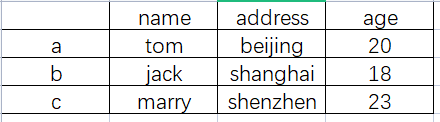  
- 行索引 ：index  
- 列索引：columns
- 值： values（numpy的二维数组）
- DateFrame属性：index，columns，values，shape  

## 表格数据结构：
- 是Series的字典，字典的键值就是二维表格的列索引， 字典的值是一个一维数组
- 

In [10]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame


## 2 DataFrame的创建方式 
- 构造函数（行列模式）    
- 字典模式  
- 从文件中读取    

In [4]:
# 行列模式
DataFrame(data=np.random.randint(0,10,size=(3,5)),index=list("abc"),columns=list("ABCDE"))

,A,B,C,D,E
a,1,0,8,7,7
b,9,4,7,1,4
c,5,7,4,5,6


In [8]:
#字典模式
dic = {
    "A":np.random.randint(0,10,size=3),
    "B":np.random.randint(0,10,size=3),
    "C":np.random.randint(0,10,size=3),
    "D":np.random.randint(0,10,size=3),
    "E":np.random.random(3)*100,
}
DataFrame(data=dic,index=list("abc"))

,A,B,C,D,E
a,9,1,1,6,12.699920
b,0,4,2,1,92.579149
c,0,3,9,2,26.485422


In [ ]:
#文件读取模式
pd.read_csv()
pd.read_excel()
pd.read_table()


In [29]:
# header 设置excel中，那几行作为列标签，默认为第一行  
# index_col 设置行标签
#pd.read_excel('案例.xlsx',header=0,index_col=0)
df=pd.read_excel('案例.xlsx')
df

,序号,姓名,地址,年龄
0,1,tom,北京,20
1,2,jack,上海,18
2,3,marry,深圳,23


In [28]:
#保存文件
df.to_excel("mydata.xlsx")

# 3 DataFrame 索引  与 切片  

（1）对列进行索引：   
- 通过字典模式  
- 通过属性方式
- 列表的方式，访问多列
  
 *可以将DateFrame的列获取为一个Series，返回的Series拥有源DataFrame相同的索引，且name的属性也设置好，就是列名*
  
（2）对行进行索引  
- 使用 .ix[]进行行索引  
- 使用 .loc[]加index进行行索引  
- 使用 .iloc[]加整数来进行行索引
- 
  *同样，返回一个Series， index为原来的columns*
    
（3）对元素进行索引  
- 使用列索引  :间接访问，存在风险 不建议  只适合读操作  
- 使用行索引： （iloc[3,1]相当于两个参数；iloc[[3,1]]，里面的[3,1]是一个参数）   直接引用  官方建议  适合读写  
- 先行 后列  
- 

In [32]:
df= DataFrame(data=np.random.randint(0,100,size=(3,5)),columns=list("ABCDE"))
df

,A,B,C,D,E
0,81,1,0,30,12
1,20,25,57,91,80
2,9,68,48,49,71


In [33]:
#字典访问方式
df["A"]

0    81
1    20
2     9
Name: A, dtype: int32

In [34]:
#属性访问方式
df.A

0    81
1    20
2     9
Name: A, dtype: int32

In [35]:
#使用列表访问 
df[["A","B"]]

,A,B
0,81,1
1,20,25
2,9,68


In [36]:
#通过.loc来访问行一行
df.loc[0]

A    81
B     1
C     0
D    30
E    12
Name: 0, dtype: int32

In [38]:
#通过列表，访问多行 ，必须使用.loc
df.loc[[0,1]]

,A,B,C,D,E
0,81,1,0,30,12
1,20,25,57,91,80


In [39]:
# 。iloc 是隐式索引访问 
df.iloc[[0,1]]

,A,B,C,D,E
0,81,1,0,30,12
1,20,25,57,91,80


In [43]:
# 元素的访问 和numpy访问逻辑一致， 先行后列  
df.loc[0,"A"]

81

In [44]:
# 元素的隐式访问
df.iloc[0,1]

1

## 3 切片 
- 索引表示的是列索引  
- 切片表示的是行切片  

In [45]:
# 行切片  
df.loc[0:1]

,A,B,C,D,E
0,81,1,0,30,12
1,20,25,57,91,80


In [47]:
# 列切片： 逻辑与二维数组一致， 先行后列 显式索引
df.loc[:,"A":"C"]

,A,B,C
0,81,1,0
1,20,25,57
2,9,68,48


In [48]:
df.iloc[:,0:3]

,A,B,C
0,81,1,0
1,20,25,57
2,9,68,48


In [60]:
df[["A","C"]]
df.loc[:,["A","C"]]
df.iloc[:,[0,2]]

,A,C
0,81,0
1,20,57
2,9,48


In [80]:
# 间接索引， 先列后行
df[["A","B"]] .loc[[0,1]]
df[["A","B"]] .loc[0:1]

df.loc[[0,1],["A","B"]]
df.loc[[0,1],"A":"B"]
df.loc[0:1,"A":"B"]
df.iloc[[0,1],[0,1]]
df.iloc[[0,1],0:2]
df.iloc[0:2,0:2]

,A,B
0,81,1
1,20,25


# 4 DataFrame 的运算
- 聚合运算： 等同与Series  
    - 在运算中自动对齐相同索引的数据
    - 如果索引不对应， 则补上NAN
 

In [85]:
df= DataFrame(data=np.random.randint(0,100,size=(3,5)),index=["tom","jaky","marry"],columns=list("ABCDE"))
df

,A,B,C,D,E
tom,41,84,7,91,54
jaky,67,64,96,78,71
marry,47,51,42,76,49


In [88]:
df.mean(axis="columns")

tom      55.4
jaky     75.2
marry    53.0
dtype: float64

In [89]:
#默认列方向聚合，
df.mean(axis= 0)

A    51.666667
B    66.333333
C    48.333333
D    81.666667
E    58.000000
dtype: float64

In [90]:
df.sum(axis= 1)

tom      277
jaky     376
marry    265
dtype: int64

## DataFrame 之间的运算
- DataFrame和一个数、array进行运算   =>广播机制  
- Dateframe和 series进行运算        =>索引对齐， axis控制方向  
- dataframe和dataframe进行运算   => 索引对齐，不分方向  
  


In [97]:
#与单个数字运算，符合广播方式
df >60

,A,B,C,D,E
tom,False,False,False,False,False
jaky,False,False,False,False,False
marry,False,False,False,False,False


In [137]:
#df之间的运算，按照索引对应，不足补位
df1=DataFrame(np.random.randint(2,3,size=(3,3)),index=list("abc"),columns=list("ABC"))
df2=DataFrame(np.random.randint(1,2,size=(4,4)),index=list("abcd"),columns=list("ABCD"))
display(df1, df2)

,A,B,C
a,2,2,2
b,2,2,2
c,2,2,2


,A,B,C,D
a,1,1,1,1
b,1,1,1,1
c,1,1,1,1
d,1,1,1,1


In [138]:
#df与arr运算  
arr = df2.values
arr

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

In [ ]:
df2+arr

In [139]:
df1+df2
df1.add(df2,fill_value=0)

,A,B,C,D
a,3.0,3.0,3.0,1.0
b,3.0,3.0,3.0,1.0
c,3.0,3.0,3.0,1.0
d,1.0,1.0,1.0,1.0


In [133]:
s1= Series(data=[1,0,0,1],index=list("ABCD"))
s2= Series(data=[2,0,0,2],index=list("abcd"))

In [134]:
df2+s1

,A,B,C,D
a,2,1,1,2
b,2,1,1,2
c,2,1,1,2
d,2,1,1,2


In [135]:
#通过axis改变方向
df2.add(s2,axis=0)

,A,B,C,D
a,3,3,3,3
b,1,1,1,1
c,1,1,1,1
d,3,3,3,3
